In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
sns.set_style('darkgrid')

In [10]:
from pathlib import Path

# Find all the folders
root_dir = Path('/home/ak/ba704297-b90c-4761-b706-728379fa9815/ba704297-b90c-4761-b706-728379fa9815')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]
#print(folders)

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*application_data.txt'):
        all_filenames.append(f.name)
#print(all_filenames)

# Open and load the file  
for f in list(set(all_filenames)):
    app_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["application_data"] 
            temp_df = pd.DataFrame(data)
            app_data = app_data.append(temp_df,ignore_index=True)  
#print(app_data)

In [9]:
# Sort the values by timeDate
app_data = app_data.sort_values(by=['timeDate'],ignore_index=True)
app_data

,name,time,timeDate
0,com.android.settings,203371178217385,08.08.2019 16:52:48.567
1,ch.ethz.inf.vs.staals.visualattentionrecorder,203374825907540,08.08.2019 16:52:52.214
2,com.miui.home,203769494807025,08.08.2019 16:59:26.883
3,com.miui.home,203871647854105,08.08.2019 17:01:09.036
4,com.android.calendar,203881403281654,08.08.2019 17:01:18.792
...,...,...,...
1002,com.miui.home,105815872576816,23.08.2019 23:12:46.345
1003,com.android.systemui,105817700152180,23.08.2019 23:12:48.172
1004,com.miui.home,105818213217284,23.08.2019 23:12:48.685
1005,com.weather.Weather,105830136654259,23.08.2019 23:13:00.609


In [11]:
# Export dataframe to csv file 
app_data.to_csv(r'/home/ak/ba704297-b90c-4761-b706-728379fa9815/app_data.csv',index=False)

In [12]:
# How many different apps?
print(app_data['name'].describe())

count              1007
unique               43
top       com.miui.home
freq                292
Name: name, dtype: object


<AxesSubplot:>

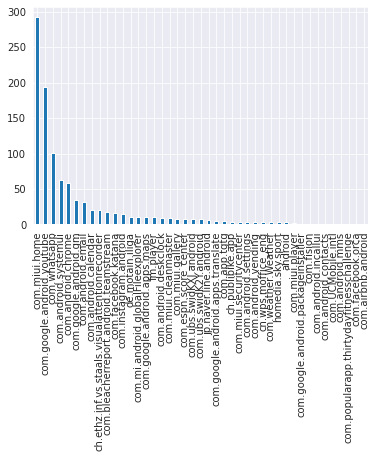

In [13]:
k= app_data.name.value_counts()
k.plot(kind='bar')